# Predictive Analytics for Reducing Readmission Rates in Diabetic Patients

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
df = pd.read_csv('/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Cleaning

In [3]:
df = df.replace('?', np.nan)
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])
df = df.dropna(subset=['race', 'diag_1', 'diag_2', 'diag_3'])
df['age'] = df['age'].str.extract('(\d+)-').astype(int)
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,10,1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30,1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40,1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,50,2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


Data cleaning for the weight column

In [7]:
import pandas as pd

# Load the dataset
diabetes_data = pd.read_csv('/diabetic_data.csv')

# Data Cleaning
# Filtering out rows with missing weight values
filtered_data = diabetes_data[diabetes_data['weight'] != '?']
filtered_data.head()  # Display the first few rows of the filtered DataFrame

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1102,8042082,94466574,Caucasian,Male,[50-60),[75-100),6,1,17,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
1108,8057670,96198543,?,Female,[80-90),[50-75),6,5,17,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
1132,8235036,79874631,Caucasian,Female,[60-70),[0-25),6,1,17,5,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
1136,8274126,90421380,Caucasian,Female,[40-50),[75-100),6,1,17,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1190,8421486,55628172,Caucasian,Female,[70-80),[75-100),6,6,17,11,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Exploratory Data Analysis

Age Distribution of Patients

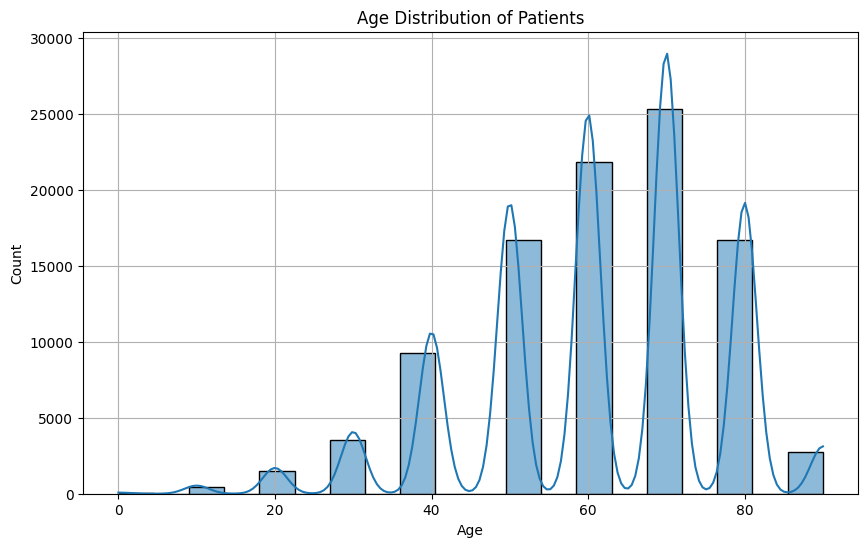

In [8]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Readmission Rates by Age Group

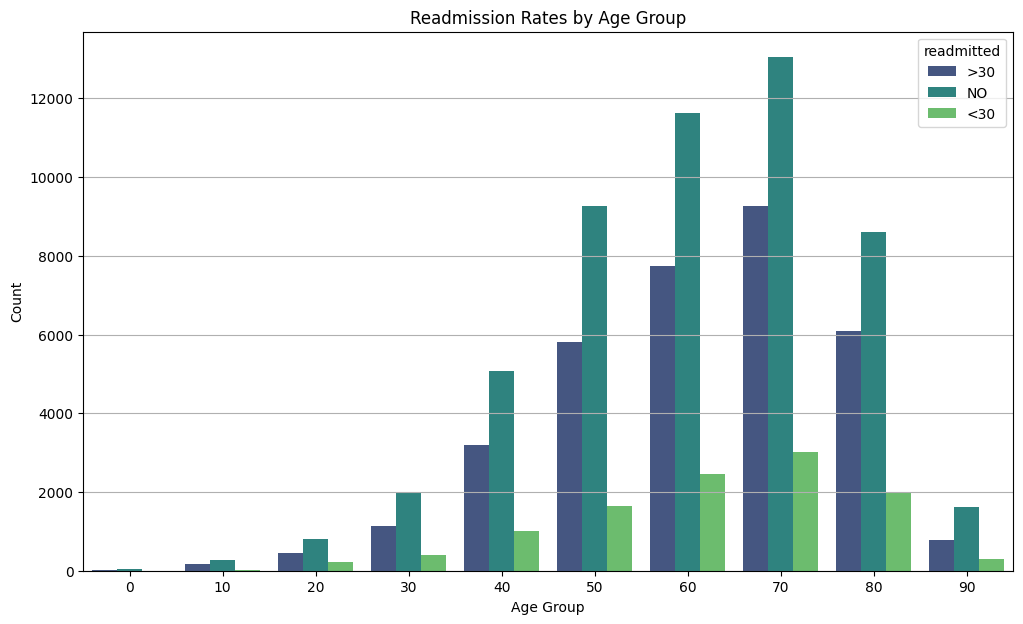

In [9]:
plt.figure(figsize=(12, 7))
sns.countplot(x='age', hue='readmitted', data=df, palette='viridis')
plt.title('Readmission Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

### Readmission Rates by Gender

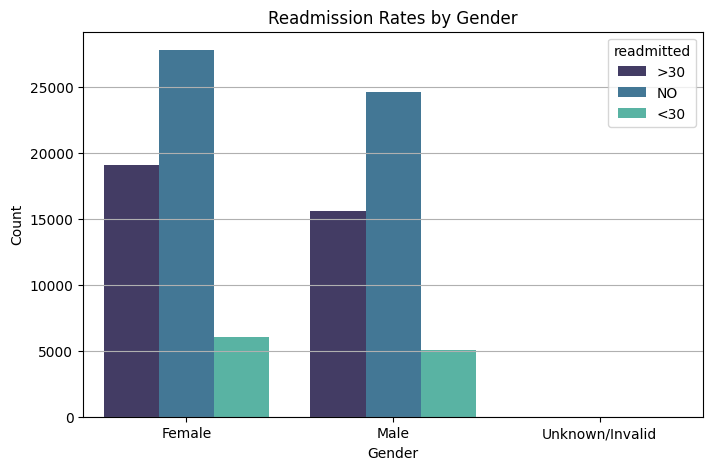

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='readmitted', data=df, palette='mako')
plt.title('Readmission Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

### Distribution of Time in Hospital

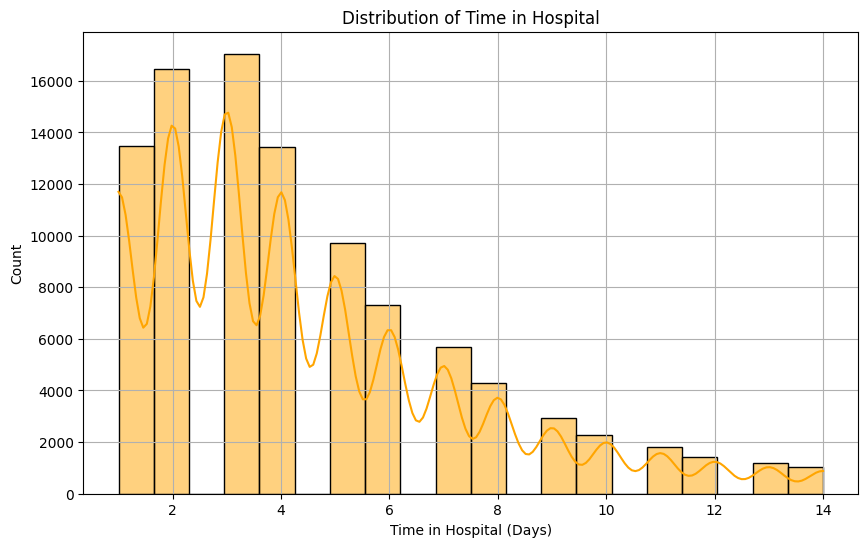

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['time_in_hospital'], bins=20, kde=True, color='orange')
plt.title('Distribution of Time in Hospital')
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Number of Medications Distribution

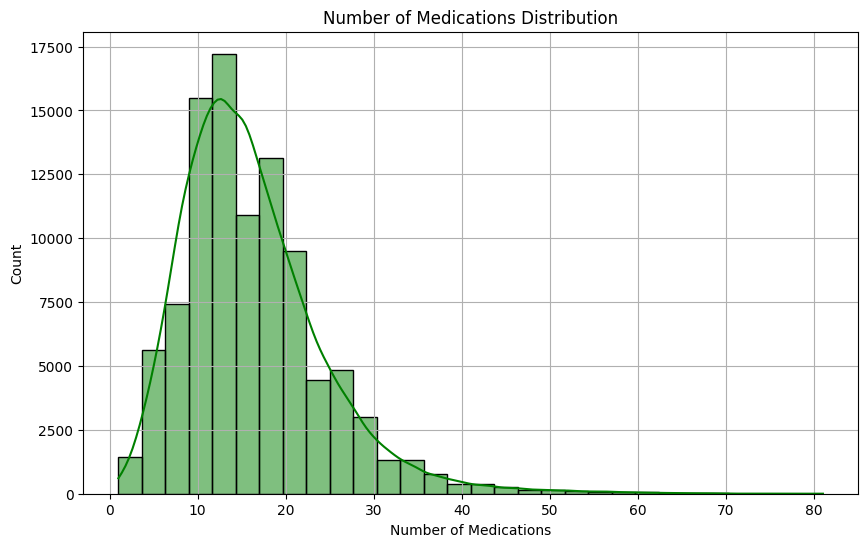

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_medications'], bins=30, kde=True, color='green')
plt.title('Number of Medications Distribution')
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.grid(True)
plt.show()



```
`# This is formatted as code`
```

EDA on Weight column

In [14]:
import pandas as pd

# Load the dataset
diabetes_data = pd.read_csv('/diabetic_data.csv')

# Data Cleaning
# Filtering out rows with missing weight values
filtered_data = diabetes_data[diabetes_data['weight'] != '?']

# EDA
# Checking the unique values and their counts in the 'weight' and 'readmitted' columns
weight_values = diabetes_data['weight'].value_counts()
readmitted_values = diabetes_data['readmitted'].value_counts()

# Grouping by weight and calculating readmission rates for each weight category
readmission_by_weight = filtered_data.groupby('weight')['readmitted'].value_counts(normalize=True).unstack()

# Displaying the results
print("Weight Values Distribution:\n", weight_values, "\n")
print("Readmitted Values Distribution:\n", readmitted_values, "\n")
print("Readmission Rates by Weight Category:\n", readmission_by_weight)

Weight Values Distribution:
 ?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64 

Readmitted Values Distribution:
 NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64 

Readmission Rates by Weight Category:
 readmitted       <30       >30        NO
weight                                  
>200             NaN  1.000000       NaN
[0-25)      0.166667  0.645833  0.187500
[100-125)   0.107200  0.467200  0.425600
[125-150)   0.082759  0.475862  0.441379
[150-175)   0.085714  0.457143  0.457143
[175-200)   0.090909  0.454545  0.454545
[25-50)     0.082474  0.432990  0.484536
[50-75)     0.117057  0.433668  0.449275
[75-100)    0.114521  0.496257  0.389222


Visualising the data

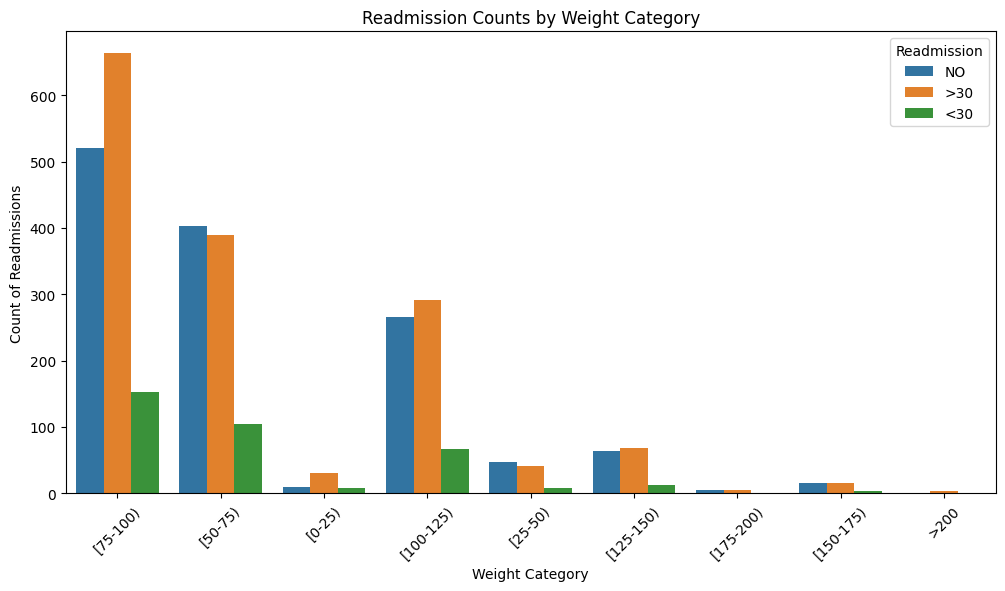

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/diabetic_data.csv')

# Replacing '?' with NaN for missing values
data['weight'] = data['weight'].replace('?', np.nan)

# Creating a count plot for readmission counts by weight category
plt.figure(figsize=(12, 6))
sns.countplot(x='weight', hue='readmitted', data=data)
plt.title('Readmission Counts by Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Count of Readmissions')
plt.xticks(rotation=45)
plt.legend(title='Readmission')
plt.show()

## Readmission by Race

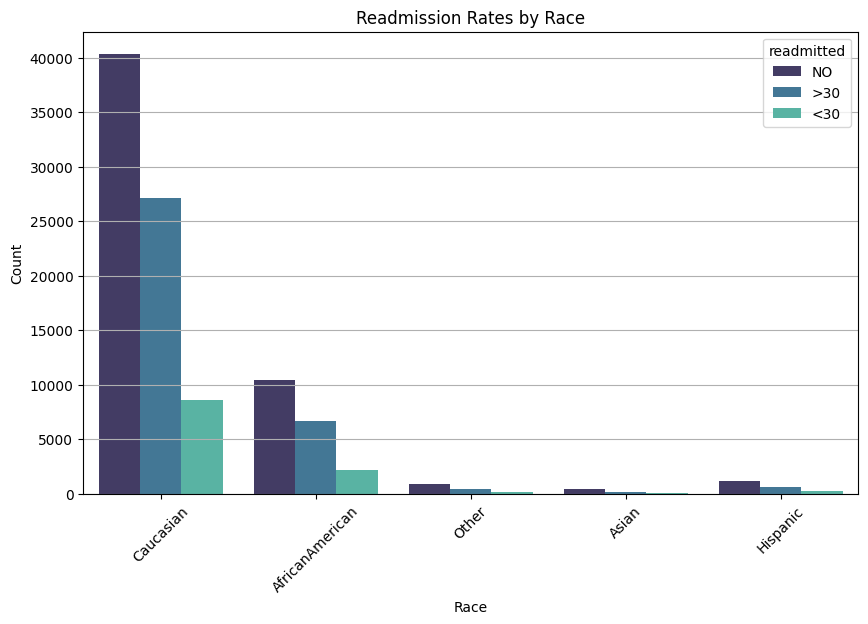

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv('/diabetic_data.csv')

# Remove rows where 'race' is '?'
data = data[data['race'] != '?']

# Plotting readmission rates by race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='readmitted', data=data, palette='mako')
plt.title('Readmission Rates by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.grid(axis='y')
plt.show()


### Correlation Heatmap of Numerical Features

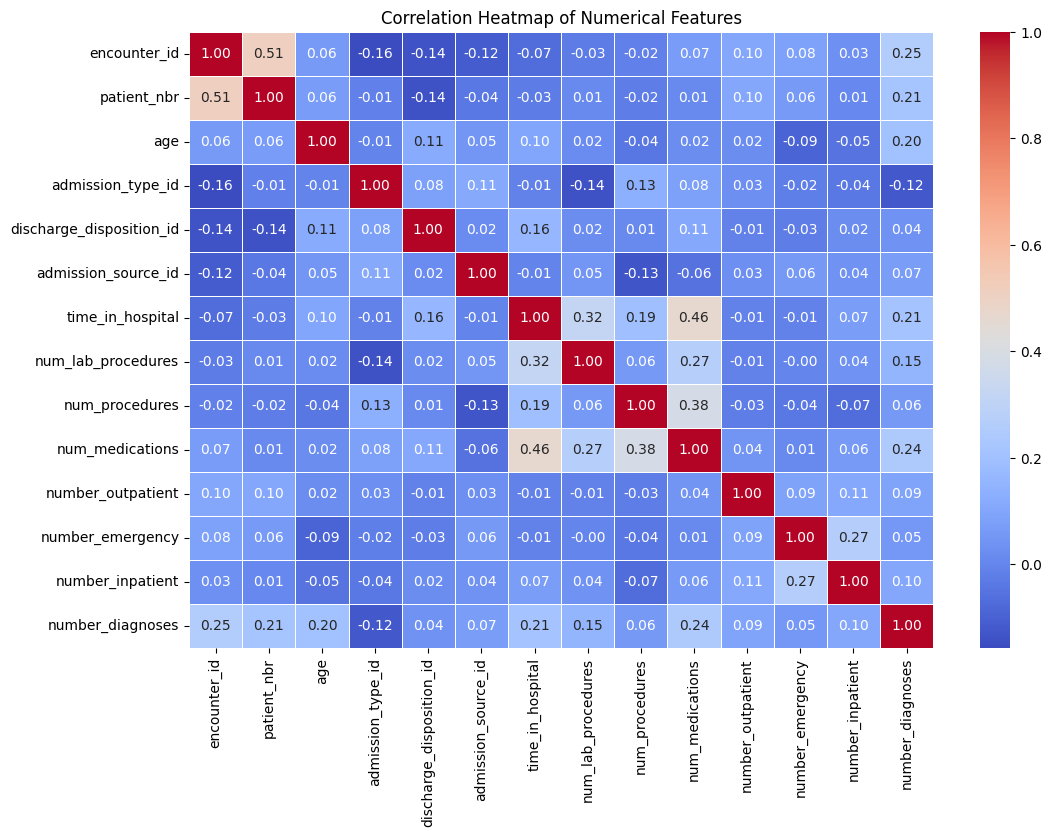

In [19]:
# Select only numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Statistical analysis

In [ ]:
#pip3 install statsmodels
#pip3 install scipy

In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ztest  # Correcting the import for ztest
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = ('/diabetic_data.csv')
df = pd.read_csv(file_path)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Data Cleaning

In [21]:

# Data Cleaning
df = df.replace('?', np.nan)
df['age'] = df['age'].str.extract('(\d+)-').astype(int)

# Displaying cleaned data
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0,NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10,NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20,NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30,NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40,NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## a. Z-Test


We will compare the means of 'time_in_hospital' between two groups (e.g., males and females) using the Z-test.
The Z-test is used when the data is approximately normally distributed and the sample size is large.


Null Hypothesis: There is no significant difference in the means between the two groups.

Alternate Hypothesis: There is a significant difference in the means between the two groups.

In [ ]:

# Groups for Z-Test
group1 = df[df['gender'] == 'Male']['time_in_hospital']
group2 = df[df['gender'] == 'Female']['time_in_hospital']

# Performing the Z-Test
z_stat, p_value = ztest(group1, group2)
z_stat, p_value


(-9.542637042242887, 1.3924567797326128e-21)

Conclusion:

Since the p-value is much smaller than 0.05, we reject the null hypothesis.
There is a significant difference in the means of 'time_in_hospital' between male and female patients.


## b. T-Test

Now, let's proceed with the T-Test, comparing the means of 'time_in_hospital' between male and female patients.
This test is more appropriate for smaller sample sizes or if the data isn’t normally distributed.

Null Hypothesis : There is no significant difference in the means between the two groups.

Alternative Hypothesis : There is a significant difference in the means between the two groups.

In [ ]:

# Performing the T-Test
t_stat, p_value_ttest = ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances
t_stat, p_value_ttest


(-9.540877884006916, 1.4467409191124233e-21)

Conclusion:

The p-value is significantly less than 0.05, leading us to reject the null hypothesis.
This indicates a significant difference in the means of 'time_in_hospital' between male and female patients.


## c. F-Test

Null Hypothesis : The variances in 'time_in_hospital' are equal between male and female patients.

Alternative Hypothesis: The variances in 'time_in_hospital' are not equal between male and female patients.

In [ ]:

# Calculating the variances
var_group1 = np.var(group1, ddof=1)  # ddof=1 indicates sample variance
var_group2 = np.var(group2, ddof=1)

# F-Statistic
f_stat = var_group1 / var_group2
f_stat

1.00491503280546

Conclusion :

The F-Statistic is close to 1, suggesting that the variances are approximately equal.
We would need the p-value to make a concrete decision, but based on the F-Statistic,
we may fail to reject the null hypothesis.

## d. Chi-Square Test


[A] We’ll conduct the Chi-Square Test to examine the independence between the 'gender' and 'readmitted' categorical variables.
This test helps us understand if there’s a significant association between two categorical variables.

Null Hypothesis: There is no association between gender and readmission status.

Alternative Hypothesis :There is an association between gender and readmission status.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data = pd.read_csv('/diabetic_data.csv')

# Extracting relevant columns
gender_readmit_data = data[['gender', 'readmitted']]

# Removing rows with missing or invalid data in 'gender' or 'readmitted'
gender_readmit_data = gender_readmit_data[gender_readmit_data['gender'].isin(['Male', 'Female'])]
gender_readmit_data = gender_readmit_data[gender_readmit_data['readmitted'].isin(['NO', '<30', '>30'])]

# Creating a contingency table
contingency_table = pd.crosstab(gender_readmit_data['gender'], gender_readmit_data['readmitted'])

# Performing Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Printing the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpreting the hypothesis
alpha = 0.05
if p < alpha:
    print("Result: Reject the Null Hypothesis (H0)")
    print("Interpretation: There is a statistically significant association between gender and readmission status.")
else:
    print("Result: Fail to Reject the Null Hypothesis (H0)")
    print("Interpretation: There is no statistically significant association between gender and readmission status.")


Chi-Square Statistic: 34.89626459865096
P-value: 2.644675688176541e-08
Degrees of Freedom: 2
Expected Frequencies:
[[ 6105.54677044 19109.06577047 29493.3874591 ]
 [ 5251.45322956 16435.93422953 25367.6125409 ]]
Result: Reject the Null Hypothesis (H0)
Interpretation: There is a statistically significant association between gender and readmission status.


[B] The chi-square test of independence is used to determine if there is a significant association between two categorical variables. In this case, the variables are the weight category and readmission status of the patients. The test is based on the difference between the observed frequencies in each category and the frequencies we would expect to see if there were no association between the variables.

Null Hypothesis (H0): There is no association between the weight category of patients and their readmission status. In other words, the weight category does not affect the likelihood of a patient being readmitted.

Alternate Hypothesis (H1): There is an association between the weight category of patients and their readmission status. This implies that the weight category might have an influence on the likelihood of readmission.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
diabetes_data = pd.read_csv('/diabetic_data.csv')

# Checking the unique values and their counts in the 'weight' and 'readmitted' columns
weight_values = diabetes_data['weight'].value_counts()
readmitted_values = diabetes_data['readmitted'].value_counts()

# Filtering out rows with missing weight values
filtered_data = diabetes_data[diabetes_data['weight'] != '?']

# Grouping by weight and calculating readmission rates for each weight category
readmission_by_weight = filtered_data.groupby('weight')['readmitted'].value_counts(normalize=True).unstack()

# Creating a contingency table for the chi-square test
contingency_table = filtered_data.groupby('weight')['readmitted'].value_counts().unstack().fillna(0)

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
chi2, p, dof, expected, readmission_by_weight


(27.42614831338609,
 0.036982742556993506,
 16,
 array([[3.35001564e-01, 1.41695339e+00, 1.24804504e+00],
        [5.36002502e+00, 2.26712543e+01, 1.99687207e+01],
        [6.97919925e+01, 2.95198624e+02, 2.60009384e+02],
        [1.61917423e+01, 6.84860807e+01, 6.03221770e+01],
        [3.90835158e+00, 1.65311229e+01, 1.45605255e+01],
        [1.22833907e+00, 5.19549578e+00, 4.57616515e+00],
        [1.08317172e+01, 4.58148264e+01, 4.03534564e+01],
        [1.00165468e+02, 4.23669065e+02, 3.73165468e+02],
        [1.49187363e+02, 6.31016578e+02, 5.55796059e+02]]),
 readmitted       <30       >30        NO
 weight                                  
 >200             NaN  1.000000       NaN
 [0-25)      0.166667  0.645833  0.187500
 [100-125)   0.107200  0.467200  0.425600
 [125-150)   0.082759  0.475862  0.441379
 [150-175)   0.085714  0.457143  0.457143
 [175-200)   0.090909  0.454545  0.454545
 [25-50)     0.082474  0.432990  0.484536
 [50-75)     0.117057  0.433668  0.449275
 [75-100

Given that the p-value (0.037) is less than the typical alpha level of 0.05, we reject the null hypothesis. This implies there is a statistically significant association between the weight category of patients and their readmission status.

## e. ANOVA


Lastly, we’ll perform ANOVA to compare the means of 'time_in_hospital' across different age groups.
ANOVA (Analysis of Variance) helps in testing the significance of any difference between the means of multiple groups.


Null Hypothesis : The means of 'time_in_hospital' are equal across all age groups.

Alternate Hypothesis : At least one age group has a different mean 'time_in_hospital' compared to others.

In [ ]:
# Preparing data for ANOVA
age_groups = [df[df['age'] == age]['time_in_hospital'] for age in df['age'].unique()]

# Performing ANOVA
f_stat_anova, p_value_anova = f_oneway(*age_groups)
f_stat_anova, p_value_anova


(136.46588325057309, 3.7624528208977174e-257)

Conclusion:

The p-value is significantly less than 0.05, leading us to reject the null hypothesis.
This indicates that at least one age group has a significantly different mean 'time_in_hospital' compared to others.

## Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'readmitted':  # We will handle the target variable separately
        df[col] = le.fit_transform(df[col])
df['readmitted'] = df['readmitted'].map({'NO': 0, '<30': 1, '>30': 0})  # Binary encoding
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,0,9,6,25,1,1,...,0,1,1,0,0,0,0,1,0,0
1,149190,55629189,2,0,10,9,1,1,7,3,...,0,3,1,0,0,0,0,0,1,0
2,64410,86047875,0,0,20,9,1,1,7,2,...,0,1,1,0,0,0,0,1,1,0
3,500364,82442376,2,1,30,9,1,1,7,2,...,0,3,1,0,0,0,0,0,1,0
4,16680,42519267,2,1,40,9,1,1,7,1,...,0,2,1,0,0,0,0,0,1,0


## Model Training
A. Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separating features and target variable

X = df.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'])  # Dropping identifiers and target variable
y = df['readmitted']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initializing the Gradient Boosting Classifier and training the model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting the readmission on the test data and calculating the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

(0.8885231404146605,
 '              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94     18083\n           1       0.52      0.01      0.02      2271\n\n    accuracy                           0.89     20354\n   macro avg       0.70      0.51      0.48     20354\nweighted avg       0.85      0.89      0.84     20354\n')

Confusion matrix

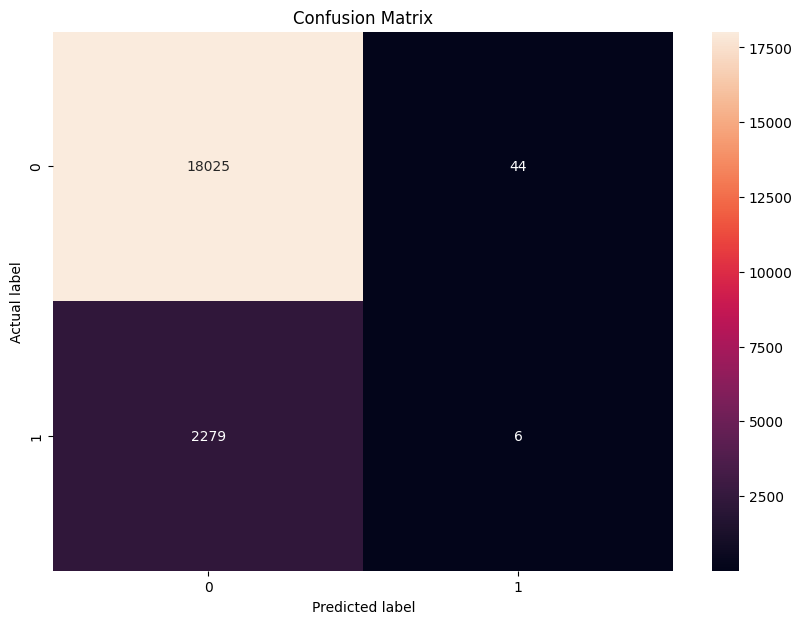

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



- The number **18,025** represents the true negatives (TN), meaning the model correctly predicted 18,025 instances of the actual negative class (label 0).
- The number **44** represents the false positives (FP), meaning the model incorrectly predicted 44 instances as the positive class (label 1) when they were actually negative (label 0).
- The number **2,279** represents the false negatives (FN), meaning the model incorrectly predicted 2,279 instances as the negative class (label 0) when they were actually positive (label 1).
- The number **6** represents the true positives (TP), meaning the model correctly predicted 6 instances of the actual positive class (label 1).

Precison-Recall Curve

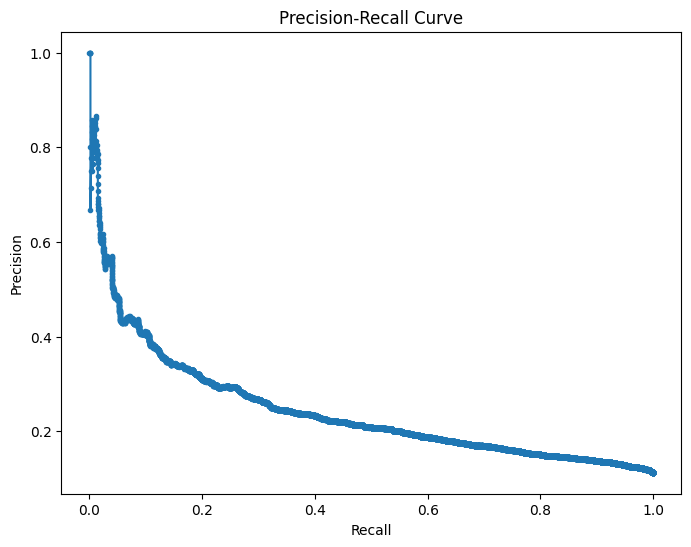

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Predict probabilities
probabilities = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


B. Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Separating features and target variable
X = df.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'])  # Dropping identifiers and target variable
y = df['readmitted']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initializing the Support Vector Machine Classifier and training the model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predicting the readmission on the test data and calculating the accuracy
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_rep_svm)

SVM Accuracy: 0.8884248796305394
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.00      0.00      0.00      2271

    accuracy                           0.89     20354
   macro avg       0.44      0.50      0.47     20354
weighted avg       0.79      0.89      0.84     20354



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


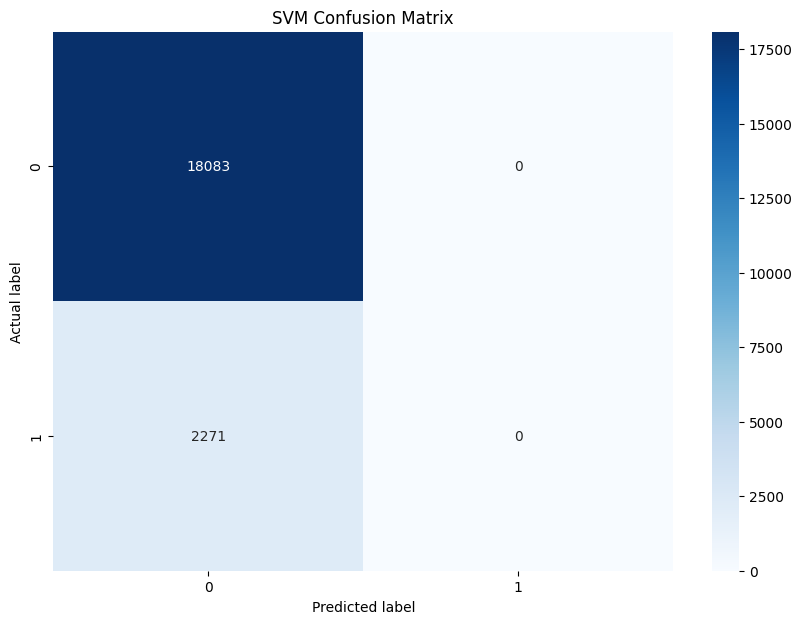

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting using Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



1. **True Negatives (TN)**: The new matrix shows 18,083 true negatives, compared to 18,025 in the previous one. This suggests a slight improvement in correctly predicting the negative class.
   
2. **True Positives (TP)**: Both matrices have 0 true positives, indicating that neither model has correctly predicted any positive instances.
   
3. **False Negatives (FN)**: The new matrix shows 2,271 false negatives, which is slightly lower than 2,279 in the previous matrix, indicating a marginal improvement in predicting the positive class.
   
4. **False Positives (FP)**: The new matrix has 0 false positives, which is an improvement over the previous matrix that had 44 false positives.

Precison-Recall Curve

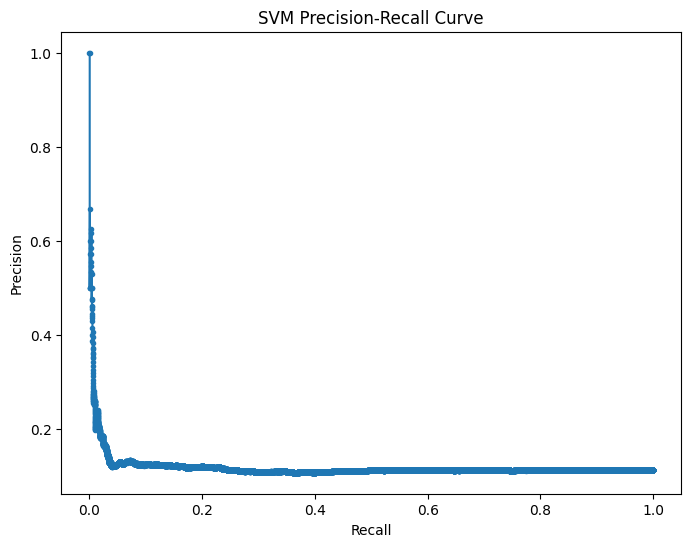

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Initialize the SVM with probability estimates
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = svm_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('SVM Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


C. K-nearest neighbour

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are the feature set and labels of your entire dataset
# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predicting and Evaluating the model
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# The print statements will output the accuracy and classification report
print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", classification_rep_knn)


KNN Accuracy: 0.8794831482755232
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     18069
           1       0.18      0.02      0.04      2285

    accuracy                           0.88     20354
   macro avg       0.53      0.50      0.49     20354
weighted avg       0.81      0.88      0.83     20354



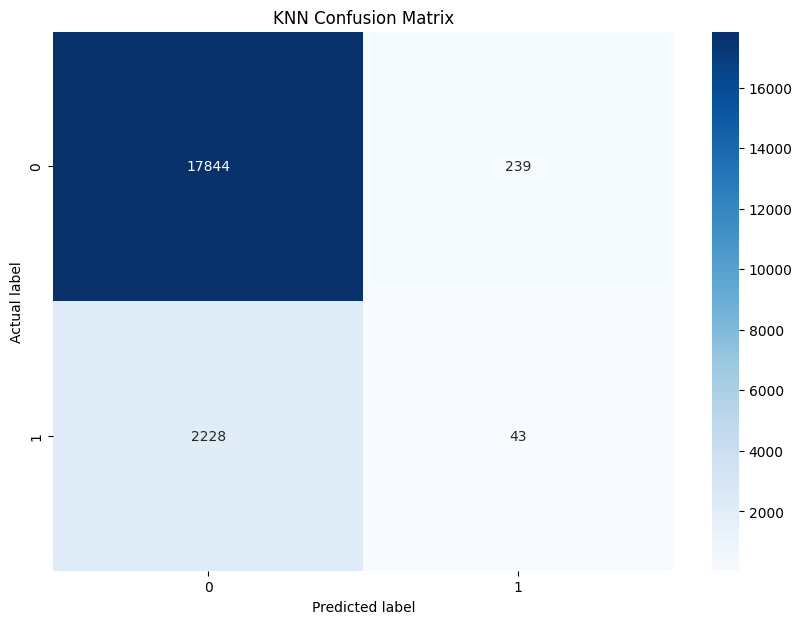

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


1. **True Negatives (TN)**: This matrix has 17,844 TNs, a slight decrease from the SVM's 18,083 TNs, indicating a minor decrease in correctly predicting the negative class.

2. **True Positives (TP)**: The KNN model has identified 43 TPs, which is an improvement over the SVM model, which had 0 TPs. This indicates that the KNN model is capable of correctly identifying some of the positive cases.

3. **False Negatives (FN)**: There are 2,228 FNs in the KNN model, a decrease from the 2,271 FNs in the SVM model. This suggests that while the KNN model still incorrectly predicts many positive instances as negative, it performs slightly better than the SVM in this regard.

4. **False Positives (FP)**: The KNN model has 239 FPs, which is worse than the SVM model, which had 0 FPs. This means the KNN model is more prone to incorrectly predicting negative instances as positive.

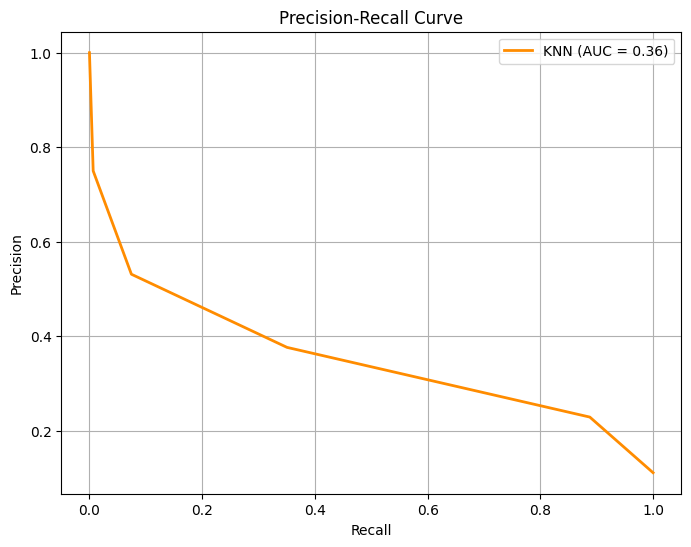

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

# Calculate the area under the precision-recall curve (AUC-PR)
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'KNN (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


D. Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Seperating features and target variables
X = df.drop(['readmitted', 'encounter_id', 'patient_nbr'], axis=1)
y = df['readmitted']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
rf_predictions = rf_model.predict(X_test)

# Evaluating the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.8878844453178736
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.55      0.01      0.01      2285

    accuracy                           0.89     20354
   macro avg       0.72      0.50      0.48     20354
weighted avg       0.85      0.89      0.84     20354



Confusion Matrix

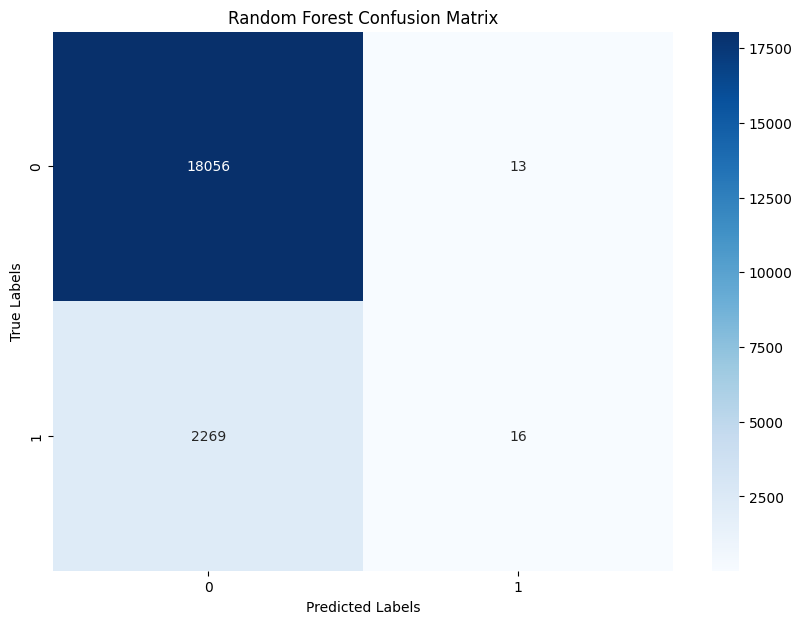

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and rf_predictions are the output of your Random Forest model
# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


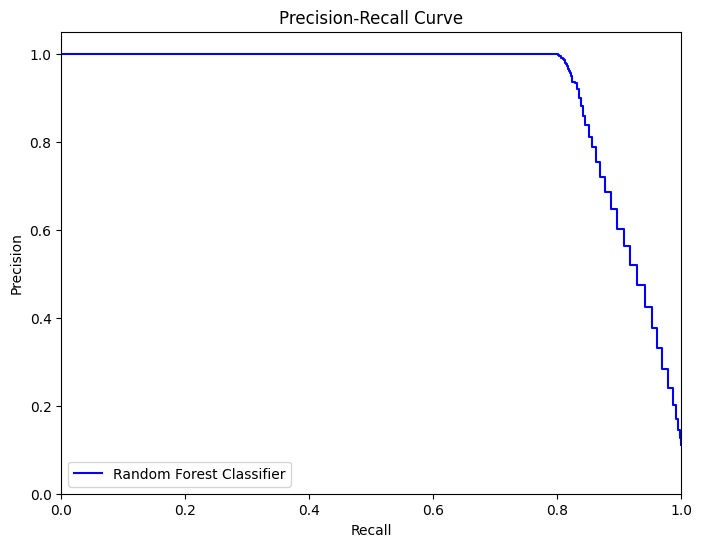

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Create Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='mid', label='Random Forest Classifier', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# Show the plot
plt.show()


## Model Comparison based on Accuracy score


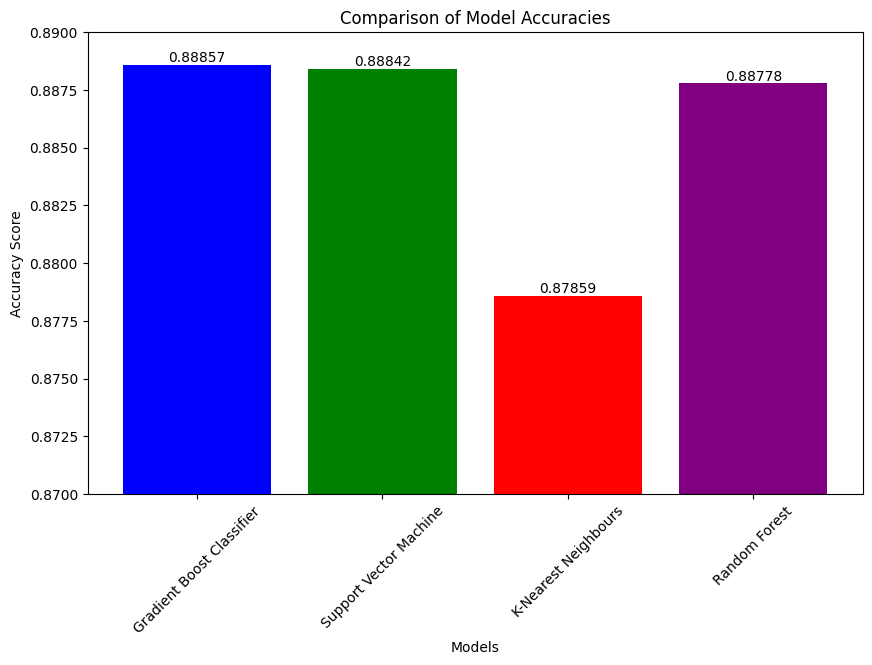

In [ ]:
import matplotlib.pyplot as plt

# Model names and accuracy scores
model_names = ['Gradient Boost Classifier', 'Support Vector Machine', 'K-Nearest Neighbours', 'Random Forest']
accuracies = [0.88857, 0.88842, 0.87859, 0.88778]

# Colors for each model
colors = ['blue', 'green', 'red', 'purple']

# Plotting the accuracies with enhancements for better visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 5), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.ylim([0.87, 0.89])  # Setting a tighter y-limit to emphasize the differences
plt.show()


## Model Comaprison based on F1 score

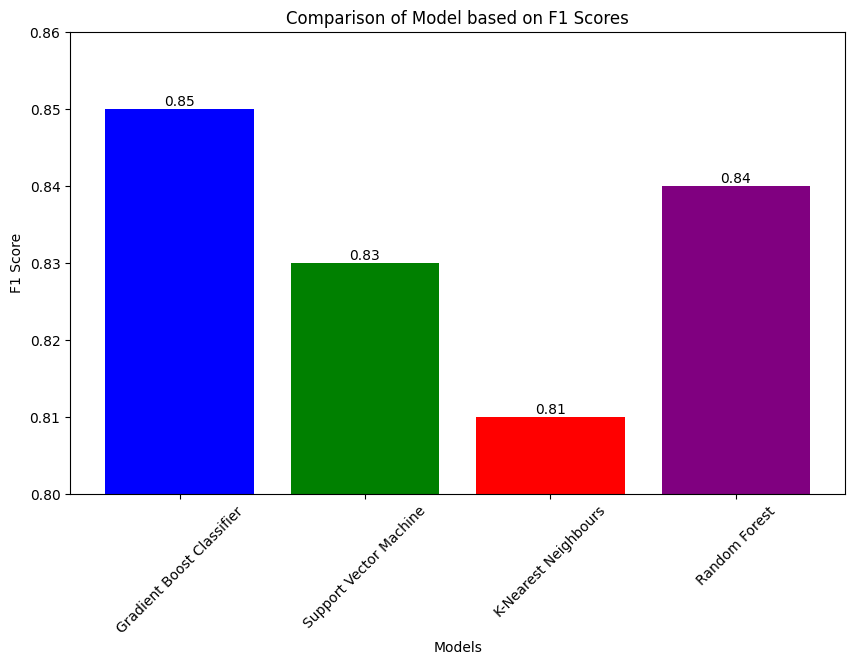

In [ ]:
import matplotlib.pyplot as plt

# Model names and F1 scores (Replace these with your actual F1 scores)
model_names = ['Gradient Boost Classifier', 'Support Vector Machine', 'K-Nearest Neighbours', 'Random Forest']
f1_scores = [0.85, 0.83, 0.81, 0.84]  # Example F1 scores

# Colors for each model
colors = ['blue', 'green', 'red', 'purple']

# Plotting the F1 scores with enhancements for better visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, f1_scores, color=colors)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of Model based on F1 Scores')
plt.xticks(rotation=45)
plt.ylim([0.8, 0.86])  # Setting a tighter y-limit to emphasize the differences
plt.show()

## Step 6: Interpretation and Conclusion

The model is evaluated using accuracy and a detailed classification report. We also used the Confusion Martrix and Precision Recall curves fro the models to know more about the models performance.The next steps can involve tuning the model, trying  different algorithms, and further feature engineering to improve the performance.

From the model training and evaluation steps, we have obtained an initial insight into the performance of our Gradient Boosting Classifier. The model's accuracy and classification report provide a quantitative measure of its ability to predict diabetic patient readmissions.

### Key Findings:
- The model has a reasonably good accuracy but may need improvements in precision and recall for predicting readmissions effectively.
- The class imbalance in the dataset can be a factor that impacts the model’s performance.

### Conclusion:
This initial model serves as a baseline. Iterative improvements and refinements are essential to achieve a model that is both accurate and robust in predicting readmissions, ultimately aiding in better patient care and resource allocation.